##Calculation of Equilibrium Concentrations in Competitive Binding Experiment

This notebook uses analytical solution of equilibrium expressions for 2 ligands competing for 1 population of protein binding sites.

Calculations are based on 
Wang, Z. X. An exact mathematical expression for describing
competitive binding of two different ligands to a protein molecule. FEBS
Lett. 1995, 360, 111−114. [doi:10.1016/0014-5793(95)00062-E](http://www.sciencedirect.com/science/article/pii/001457939500062E) 


We will model binding of two ligands, fluorescent ligand (A) and non-fluorescent ligand (B), to protein (P). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Math, Latex #Do we even need this anymore?
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Strictly Competitive Binding Model

$ {K_A} $ and $ {K_A} $ are dissociation constants of A and B, binding to P.  

$$PA {\stackrel{K_A}{\rightleftharpoons}}  A + B $$

$$PB {\stackrel{K_B}{\rightleftharpoons}} B + P$$

$$ K_A = \frac{[P][A]}{[PA]} $$ $$ K_B = \frac{[P][B]}{[PB]} $$

$[A]_0$, $[B]_0$ and $[P]_0$ are total concentrations of A, B and P. $[A]$, $[B]$ and $[P]$ are the free concentrations. Conservation of mass:
$$[A]_0 = [A]+[PA]$$
$$[B]_0 = [A]+[PB]$$
$$[P]_0 = [P]+[PA]+[PB]$$

Combining with equilibrium expressions:
$$ K_A = \frac{[P][A]_0 - [PA]}{[PA]} $$ $$ K_B = \frac{[P]([B]_0-[PB])}{[PB]} $$
Reorganize to get [PA] and [PB].
$$ [PA] = \frac{[P][A]_0}{K_A+[P]} $$ $$ [PB] = \frac{[P][B]_0}{K_B+[P]} $$

$$ [P]_0 = [P] + \frac{[P][A]_0}{K_A+[P]} + \frac{[P][B]_0}{K_B+[P]} $$

Expanding results:
$ 0 = [P]^3 + K_A[P]^2+ K_B[P]^2 + [A]_0[P]^2 + [B]_0[P]^2 - [P]_0[P]^2 +K_AK_B[P] +[A]_0K_B[P] +[B]_0K_A[P] - K_A[P]_0[P]-K_B[P]_0[P]-K_AK_B[P]_0$

$ 0 = [P]^3 + a[P]^2 + b[P] +c  $

$ a = K_A+ K_B + [A]_0 + [B]_0 - [P]_0 $

$ b = K_AK_B +K_B([A]_0-[P]_0) +K_B([B]_0 - [P]_0) $

$ c = - K_AK_B[P]_0$

Substituting $ [P] = u - \frac{a}{3} $, gives us:

$ u^3 -qu - r =0 $

$ q=\frac{a^2}{3}-b $

$ r = \frac{-2}{27}a^3+\frac{1}{3}ab-c$

Discriminant:
$ \Delta = \frac{r^2}{4} - \frac{q^3}{27}$ 

Since $ \Delta < 0$, there are 3 real roots. 
Only physically meaningful root is $ u = \frac{2}{3}\sqrt{a^2-3b}\cos(\frac{\theta}{3})$, where $\theta=\arccos{\frac{-2a^3+9ab-27c}{2\sqrt{(a^2-3b)^3}}}$


Then we can calculate equilibrium concentrations of species.

$$ [P]= u -\frac{a}{3} = -\frac{a}{3} + \frac{2}{3}\sqrt{a^2-3b}\cos(\frac{\theta}{3}) $$

$$ [PA] = \frac{[P][A]_0}{K_A+[P]} = \frac{[A]_0(2\sqrt{a^2-3b}\cos(\frac{\theta}{3})-a)}{3K_A+(2\sqrt{a^2-3b}\cos(\frac{\theta}{3})-a)} $$ 

$$ [PB] = \frac{[P][B]_0}{K_B+[P]} = \frac{[B]_0(2\sqrt{a^2-3b}\cos(\frac{\theta}{3})-a)}{3K_B+(2\sqrt{a^2-3b}\cos(\frac{\theta}{3})-a)} $$

$$[A] = [A]_0-[PA] $$
$$[B] = [B]_0-[PB]$$

In [2]:
#Competitive binding function
def three_component_competitive_binding_exact(Ptot, Atot, K_A, Btot, K_B):
    """
    Parameters
    ----------
    Ptot : float
        Total protein concentration
    Atot : float
        Total tracer(fluorescent) ligand concentration
    K_A : float
        Dissociation constant of A
    Btot : float
        Total competitive ligand concentration
    K_B : float
        Dissociation constant of B
        
    Returns
    -------
    P : float
        Free protein concentration
    A : float
        Free ligand concentration
    B : float
        Free ligand concentration
    PA : float
        Concentration of PA complex
    PB : float
        Concentration of PB complex
        
    Usage
    -----
    [P, A, B, PA, PB] = three_component_competitive_binding(Ptot, Atot, K_A, Btot, K_B)
    """
    
    # P^3 + aP^2 + bP + c = 0
    a = K_A + K_B + Atot + Btot - Ptot
    b = K_A*K_B + K_B*(Atot-Ptot) + K_B*(Btot - Ptot)
    c = -K_A*K_B*Ptot
    
    # Subsitute P=u-a/3
    # u^3 - qu - r = 0 where 
    q = (a**2)/3.0 - b
    r = (-2.0/27.0)*a**3 +(1.0/3.0)*a*b - c
    
    # Discriminant
    delta = (r**2)/4.0 -(q**3)/27.0
    
    # 3 roots. Physically meaningful root is u.
    theta = np.arccos((-2*(a**3)+9*a*b-27*c)/(2*sqrt((a**2-3*b)**3)))
    u = (2.0/3.0)*sqrt(a**2-3*b)*cos(theta/3.0)
    
    # Free protein concentration [P]
    P = u - a/3.0
    
    # [PA]
    PA = P*Atot/(K_A + P)
    
    # [PB]
    PB = P*Btot/(K_B + P)
    
    # Free A concentration [A]
    A = Atot - PA
    
    # Free B concentration [B]
    B = Btot - PB
    
    # Apparent Kd of A (shift caused by competitive ligand)
    # K_A_app = K_A*(1+B/K_B)
    
    return [P, A, B, PA, PB]

#### For one set of conditions

In [3]:
# Initial total concentrations of P, A and B (uM)
Ptot=0.5
Atot=200
Btot=50

# Dissociation constant for fluorescent ligand A: K_A (uM)
K_A=15

# Dissociation constant for non-fluorescent ligand B: K_B (uM)
K_B=3.85

[P, A, B, PA, PB] = three_component_competitive_binding_exact(Ptot, Atot, K_A, Btot, K_B)
[P, A, B, PA, PB]

[0.028199122591431092,
 199.62471720847722,
 49.636440501118621,
 0.37528279152277422,
 0.36355949888138162]

### Modelling the competition experiment - Expected Binding Curve


Ideally protein concentration should be 10 fold lower then Kd. It must be at least hafl of Kd if fluorescence detection requires higher protein concentration.

For our assay it will be 0.5 uM.

Ideally ligand concentation should span 100-fold Kd to 0.01-fold Kd, log dilution.

The ligand concentration will be in half log dilution from 20 uM ligand.

In [4]:
# Dilution series for fluorescent ligand A

# Number of wells in a dilution series
num_wells = 12.0

# (uM)
Amax = 2000
Amin = 0.02

# Factor for logarithmic dilution (n)
# Amax*((1/n)^(11)) = Amin for 12 wells
n = (Amax/Amin)**(1/(num_wells-1))

# Fluorescent-ligand titration series (uM)
Atot = Amax / np.array([n**(float(i)) for i in range(12)])
Atot

array([  2.00000000e+03,   7.02238347e+02,   2.46569348e+02,
         8.65752256e+01,   3.03982217e+01,   1.06733985e+01,
         3.74763485e+00,   1.31586645e+00,   4.62025940e-01,
         1.62226166e-01,   5.69607174e-02,   2.00000000e-02])

In [5]:
# Dissociation constant for non-fluorescent ligand A: K_dA (uM)
K_A = 15

# Dissociation constant for non-fluorescent ligand B: K_B (uM)
K_B=3.85

### Without competitive ligand

In [6]:

# Constant concentration of B that will be added to all wells (uM)
# If there is no competitive ligand 
Btot= 0
[P_B0, A_B0, B_B0, PA_B0, PB_B0] = three_component_competitive_binding_exact(Ptot, Atot, K_A, Btot, K_B)

# If B concentration is 10 uM
Btot= 10
[P_B10, A_B10, B_B10, PA_B10, PB_B10] = three_component_competitive_binding_exact(Ptot, Atot, K_A, Btot, K_B)

# If B concentration is 50 uM
Btot= 50
[P_B50, A_B50, B_B50, PA_B50, PB_B50] = three_component_competitive_binding_exact(Ptot, Atot, K_A, Btot, K_B)

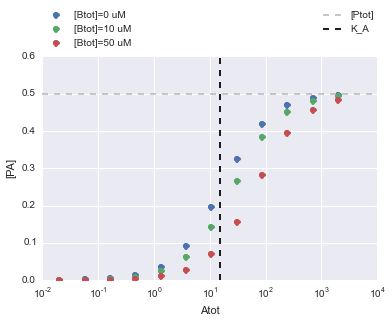

In [7]:
plt.semilogx(Atot,PA_B0, 'o', label='[Btot]=0 uM')
plt.semilogx(Atot,PA_B10, 'o', label='[Btot]=10 uM')
plt.semilogx(Atot,PA_B50, 'o', label='[Btot]=50 uM')
plt.xlabel('Atot')
plt.ylabel('[PA]')
plt.ylim(1e-3,6e-1)
plt.xlim(1e-2,1e+4)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
plt.axvline(K_A,color='k',linestyle='--',label='K_A')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


##Predicting experimental fluorescence signal of saturation binding experiment

Molar fluorescence values based on dansyl amide.

In [8]:
# Background fluorescence
BKG = 86.2

# Molar fluorescence of free ligand
MF = 2.5

# Molar fluorescence of ligand in complex
FR = 306.1
MFC = FR * MF

### Fluorescent ligand (L) titration into buffer

In [9]:
Atot

array([  2.00000000e+03,   7.02238347e+02,   2.46569348e+02,
         8.65752256e+01,   3.03982217e+01,   1.06733985e+01,
         3.74763485e+00,   1.31586645e+00,   4.62025940e-01,
         1.62226166e-01,   5.69607174e-02,   2.00000000e-02])

In [10]:
# Fluorescence measurement of buffer + ligand L titrations
A=Atot
Flu_buffer = MF*A + BKG
Flu_buffer

array([ 5086.2       ,  1841.79586711,   702.62336972,   302.63806405,
         162.19555415,   112.88349616,    95.56908711,    89.48966612,
          87.35506485,    86.60556542,    86.34240179,    86.25      ])

(50, 6000)

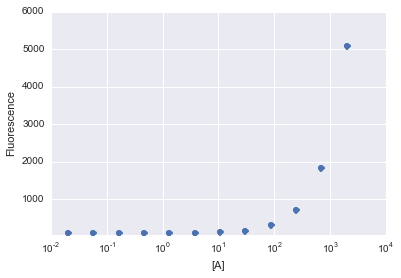

In [11]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Atot,Flu_buffer,'o')
plt.xlabel('[A]')
plt.ylabel('Fluorescence')
plt.ylim(50,6000)

### Fluorescent ligand titration into protein (HSA) 

In [12]:
# Fluorescence measurement of the HSA + A serial dilution + 0 uM B
Flu_HSA_B0 = MF*A_B0 + BKG + FR*MF*PA_B0

# Fluorescence measurement of the HSA + A serial dilution + 10 uM B
Flu_HSA_B10 = MF*A_B10 + BKG + FR*MF*PA_B10

# Fluorescence measurement of the HSA + A serial dilution + 50 uM B
Flu_HSA_B50 = MF*A_B50 + BKG + FR*MF*PA_B50

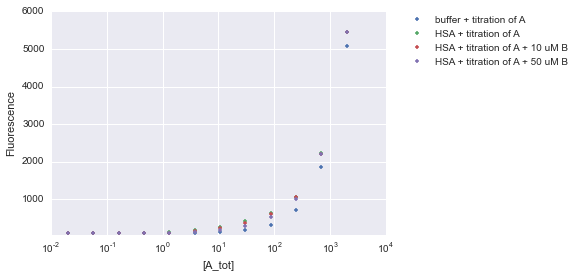

In [13]:
plt.semilogx(Atot,Flu_buffer,'.',label='buffer + titration of A  ')
plt.semilogx(Atot, Flu_HSA_B0 ,'.', label='HSA + titration of A')
plt.semilogx(Atot, Flu_HSA_B10 ,'.', label='HSA + titration of A + 10 uM B ')
plt.semilogx(Atot, Flu_HSA_B50 ,'.', label='HSA + titration of A + 50 uM B')
plt.xlabel('[A_tot]')
plt.ylabel('Fluorescence')
plt.ylim(50,6000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Checking ligand depletion

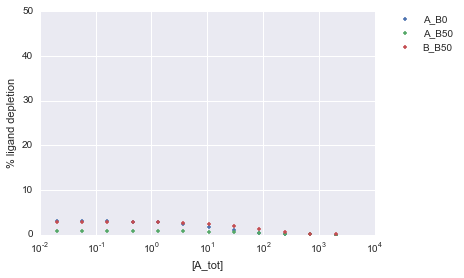

In [14]:
A_percent_depletion_B0=((Atot-A_B0)/Atot)*100
plt.semilogx(Atot,A_percent_depletion_B0,'.',label='A_B0')
             
A_percent_depletion_B50=((Atot-A_B50)/Atot)*100
plt.semilogx(Atot,A_percent_depletion_B50,'.',label='A_B50') 

Btot=50
B_percent_depletion_B50=((Btot-B_B50)/Btot)*100
plt.semilogx(Atot,B_percent_depletion_B50,'.',label='B_B50') 

plt.xlabel('[A_tot]')
plt.ylabel('% ligand depletion')
plt.ylim(-0,50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)